**1. Is it OK to initialize all the weights to the same value as long as that value is selected
randomly using He initialization?**

Initializing all the weights to the same value can lead to symmetry issues in neural networks and may prevent the network from learning. He initialization, which is a method to initialize the weights with a random value drawn from a normal distribution with a mean of 0 and a standard deviation of sqrt(2/number of inputs), is used to prevent such issues. Therefore, it is not recommended to initialize all the weights to the same value, even if using He initialization.

**2. Is it OK to initialize the bias terms to 0?**


Initializing the bias terms to 0 is a common practice, but it may not always be the best choice. In some cases, initializing the biases to a non-zero value can improve the performance of the network. It's worth experimenting with different values to see what works best for a particular problem.

**3. Name three advantages of the SELU activation function over ReLU.**

Three advantages of the Scaled Exponential Linear Unit (SELU) activation function over the Rectified Linear Unit (ReLU) activation function are:

SELU can lead to better network performance as it can produce more accurate results for deep networks.

SELU can alleviate the vanishing/exploding gradient problem, which is a common issue in deep networks.

SELU can preserve the mean and variance of the activations during forward propagation, which is beneficial for the training process.

**4. In which cases would you want to use each of the following activation functions: SELU, leaky
ReLU (and its variants), ReLU, tanh, logistic, and softmax?**

Here are some general guidelines for choosing activation functions:

SELU: This activation function is well suited for deep neural networks as it has the property of self-normalization, which helps alleviate the vanishing/exploding gradient problem.

Leaky ReLU (and its variants): These activation functions are a modification of ReLU that allow for a small, non-zero gradient when the input is negative, which can help mitigate the dying ReLU problem. They are often used as an alternative to ReLU when the network is experiencing saturation.

ReLU: ReLU is a popular activation function that is computationally efficient and easy to train. It is often used as the activation function in the hidden layers of a network.

tanh: tanh is a sigmoid activation function that maps its inputs to values between -1 and 1. It is often used in recurrent neural networks, where the mean-centered outputs are desirable.

Logistic: The logistic activation function is similar to the tanh activation function, but maps its inputs to the range [0, 1], making it useful for binary classification problems.

Softmax: The softmax activation function is commonly used in the output layer of a network for multi-class classification problems. It maps the inputs to a probability distribution over the classes, making it useful for selecting the class with the highest predicted probability.

**5. What may happen if you set the momentum hyperparameter too close to 1 (e.g., 0.99999)
when using an SGD optimizer?**

If the momentum hyperparameter is set too close to 1 when using an Stochastic Gradient Descent (SGD) optimizer, the optimizer may overshoot the minimum value of the loss function and oscillate around it. This can result in slow convergence or even cause the optimizer to diverge.

When the momentum is close to 1, the optimizer will heavily rely on the previous update direction and neglect the current gradient information. This can result in the optimizer getting stuck in a local minimum or fluctuating around it, making it difficult for the optimizer to converge to the global minimum.

Therefore, it is important to set the momentum hyperparameter carefully and ensure that it is not too close to 1, as this can negatively impact the optimization process.

**6. Name three ways you can produce a sparse model.**

L1 Regularization: This method adds a penalty term to the loss function proportional to the sum of the absolute values of the weights, encouraging the network to use only a small number of the weights.

Dropout: This technique randomly drops out a certain fraction of the neurons during each training iteration, forcing the network to learn a more compact and robust representation.

Pruning: This method involves removing the smallest magnitude weights from the network after training, effectively reducing the number of parameters in the model and producing a sparse representation.

These techniques can help produce sparse models, which can be faster to run, easier to interpret, and more computationally efficient than dense models.L1 

**7. Does dropout slow down training? Does it slow down inference (i.e., making predictions on
new instances)? What about MC Dropout?**

**Dropout can slow down training** as it involves randomly dropping out neurons during each iteration, which increases the computational cost of training.
During training, dropout involves randomly dropping out neurons in the network with a certain probability (the dropout rate), effectively reducing the size of the network. This can increase the computational cost of training as each iteration involves a larger number of forward and backward computations, which can result in slower convergence.

For example, consider a fully-connected layer with N neurons. During each iteration, a fraction (1-p) of the neurons will be dropped out, where p is the dropout rate. This means that instead of computing the activations for N neurons, the forward pass will now only compute the activations for (1-p)N neurons, which increases the computational cost. Additionally, during the backward pass, the gradients must be calculated for all N neurons, even though only (1-p)N of them are used during the forward pass. This further increases the computational cost of training.

Overall, the use of dropout can slow down the training process, but it can also improve the generalization performance of the model and prevent overfitting.

**Dropout does not slow down inference** as it is typically only used during training and is not applied during the evaluation phase.

MC Dropout is a variation of Dropout that involves applying Dropout during inference to obtain multiple predictions for each input and estimate the model's uncertainty. MC Dropout can slow down inference as it involves making multiple forward passes through the network with different dropout masks, which increases the computational cost.

**Practice training a deep neural network on the CIFAR10 image dataset:**

a. **Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the
point of this exercise). Use He initialization and the ELU activation function.**

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.initializers import HeNormal

model = Sequential()

# Initialize the first layer with He Normal initialization
model.add(Dense(100, input_shape=(32,32,3), kernel_initializer=HeNormal()))
model.add(Activation('elu'))

# Add the remaining 19 hidden layers
for i in range(19):
    model.add(Dense(100, kernel_initializer=HeNormal()))
    model.add(Activation('elu'))

# Add the final output layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


*Note that this code only defines the architecture of the model and does not perform the actual training. To train the model, you would need to pass the training data (images and labels) to the fit method of the model.*

**b. Using Nadam optimization and early stopping, train the network on the CIFAR10
dataset. You can load it with keras.datasets.cifar10.load_​data(). The dataset is
composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for
testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons.
Remember to search for the right learning rate each time you change the model’s
architecture or hyperparameters.**

In [22]:
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
import numpy as np

# Load the CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Reshape target data
y_train = np.reshape(y_train, (len(y_train), 10))
y_test = np.reshape(y_test, (len(y_test), 10))




# Build model
model2 = Sequential()
model2.add(Flatten(input_shape=(32, 32, 3)))
model2.add(Dense(100, kernel_initializer='he_normal'))
model2.add(Activation('elu'))

for i in range(19):
    model2.add(Dense(100, kernel_initializer=HeNormal()))
    model2.add(Activation('elu'))


# Output Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.compile(optimizer='Nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model2.fit(X_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/100
391/391 [==============================] - 13s 24ms/step - loss: 2.2297 - accuracy: 0.2169 - val_loss: 2.0003 - val_accuracy: 0.2584
Epoch 2/100
391/391 [==============================] - 9s 23ms/step - loss: 1.8873 - accuracy: 0.3148 - val_loss: 1.7632 - val_accuracy: 0.3567
Epoch 3/100
391/391 [==============================] - 9s 23ms/step - loss: 1.7894 - accuracy: 0.3594 - val_loss: 1.8808 - val_accuracy: 0.3205
Epoch 4/100
391/391 [==============================] - 9s 22ms/step - loss: 1.7113 - accuracy: 0.3883 - val_loss: 1.6885 - val_accuracy: 0.3859
Epoch 5/100
391/391 [==============================] - 9s 22ms/step - loss: 1.6511 - accuracy: 0.4102 - val_loss: 1.6137 - val_accuracy: 0.4308
Epoch 6/100
391/391 [==============================] - 9s 24ms/step - loss: 1.6058 - accuracy: 0.4280 - val_loss: 1.5628 - val_accuracy: 0.4522
Epoch 7/100
391/391 [==============================] - 9s 22ms/step - loss: 1.5624 - accuracy: 0.4417 - val_loss: 1.5878 - val_accuracy

In [17]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_147 (Dense)           (None, 100)               307300    
                                                                 
 activation_143 (Activation)  (None, 100)              0         
                                                                 
 dense_148 (Dense)           (None, 100)               10100     
                                                                 
 activation_144 (Activation)  (None, 100)              0         
                                                                 
 dense_149 (Dense)           (None, 100)               10100     
                                                                 
 activation_145 (Activation)  (None, 100)             

In [13]:
y_train.shape

(50000, 10)

*In this code, the EarlyStopping callback is used to stop training when the validation loss stops improving. The fit method trains the model on the training data X_train and y_train and uses the validation data X_test and y_test to evaluate the model's performance during training. The history object returned by the fit method contains information about the model's training and validation loss and accuracy for each epoch, which can be used for model evaluation and hyperparameter tuning.*

**c. Now try adding Batch Normalization and compare the learning curves: Is it
converging faster than before? Does it produce a better model? How does it affect
training speed?**

In [19]:
import keras
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.layers import BatchNormalization

# Load the CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


# Build model
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(100, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))

for i in range(19):
    model.add(Dense(100, kernel_initializer=HeNormal()))
    model.add(BatchNormalization())
    model.add(Activation('elu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_bn = model.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_data=(X_test, y_test),
                       callbacks=[early_stopping])


Epoch 1/100
391/391 [==============================] - 24s 34ms/step - loss: 1.7497 - accuracy: 0.3743 - val_loss: 2.1513 - val_accuracy: 0.3024
Epoch 2/100
391/391 [==============================] - 13s 33ms/step - loss: 1.5359 - accuracy: 0.4538 - val_loss: 1.7103 - val_accuracy: 0.3991
Epoch 3/100
391/391 [==============================] - 12s 30ms/step - loss: 1.4490 - accuracy: 0.4863 - val_loss: 1.8103 - val_accuracy: 0.3793
Epoch 4/100
391/391 [==============================] - 13s 32ms/step - loss: 1.3892 - accuracy: 0.5058 - val_loss: 1.8890 - val_accuracy: 0.3781
Epoch 5/100
391/391 [==============================] - 12s 32ms/step - loss: 1.3345 - accuracy: 0.5241 - val_loss: 1.6159 - val_accuracy: 0.4505
Epoch 6/100
391/391 [==============================] - 13s 34ms/step - loss: 1.2919 - accuracy: 0.5420 - val_loss: 1.7134 - val_accuracy: 0.4301
Epoch 7/100
391/391 [==============================] - 13s 33ms/step - loss: 1.2554 - accuracy: 0.5520 - val_loss: 1.5968 - val_ac

*In this code, batch normalization is added after each dense layer. Batch normalization normalizes the activations of each layer in a mini-batch, which can help to stabilize the training process and improve the model's performance.*

To compare the learning curves with the previous example, you can plot the training and validation loss and accuracy using matplotlib:

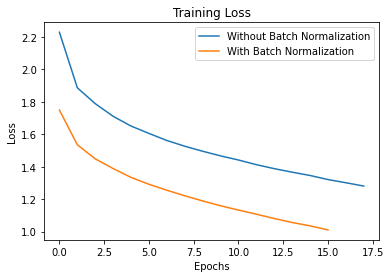

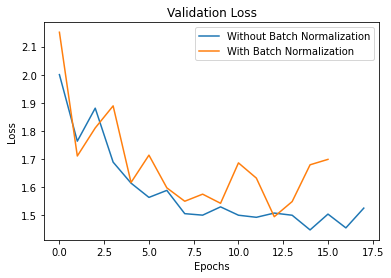

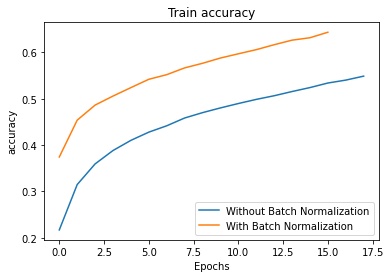

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Without Batch Normalization')
plt.plot(history_bn.history['loss'], label='With Batch Normalization')
plt.legend()
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['val_loss'], label='Without Batch Normalization')
plt.plot(history_bn.history['val_loss'], label='With Batch Normalization')
plt.legend()
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['accuracy'], label='Without Batch Normalization')
plt.plot(history_bn.history['accuracy'], label='With Batch Normalization')
plt.legend()
plt.title('Train accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()


**d. Try replacing Batch Normalization with SELU, and make the necessary adjustements
to ensure the network self-normalizes (i.e., standardize the input features, use
LeCun normal initialization, make sure the DNN contains only a sequence of dense
layers, etc.).**

To replace Batch Normalization with SELU, the first step is to standardize the input features by subtracting the mean and dividing by the standard deviation. This can be done using scikit-learn's StandardScaler. Then, we'll use the LeCun normal initialization method to initialize the weights.

In [21]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Standardize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 32 * 32 * 3)).reshape(-1, 32, 32, 3)
X_test = scaler.transform(X_test.reshape(-1, 32 * 32 * 3)).reshape(-1, 32, 32, 3)

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Define model
model = keras.models.Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='selu', 
                                 kernel_initializer='lecun_normal'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='nadam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train model
early_stopping = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=100, 
                    validation_split=0.1, callbacks=[early_stopping])

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


Epoch 1/100
1407/1407 [==============================] - 25s 14ms/step - loss: 1.9837 - accuracy: 0.2809 - val_loss: 1.9218 - val_accuracy: 0.2856
Epoch 2/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.7637 - accuracy: 0.3659 - val_loss: 1.8455 - val_accuracy: 0.3484
Epoch 3/100
1407/1407 [==============================] - 23s 17ms/step - loss: 1.6708 - accuracy: 0.4007 - val_loss: 1.7916 - val_accuracy: 0.3870
Epoch 4/100
1407/1407 [==============================] - 20s 15ms/step - loss: 1.6079 - accuracy: 0.4244 - val_loss: 1.8636 - val_accuracy: 0.3592
Epoch 5/100
1407/1407 [==============================] - 22s 15ms/step - loss: 1.5614 - accuracy: 0.4458 - val_loss: 1.6081 - val_accuracy: 0.4430
Epoch 6/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.5215 - accuracy: 0.4634 - val_loss: 1.6037 - val_accuracy: 0.4498
Epoch 7/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.4895 - accuracy: 0.4765 - val_loss: 1

**e. Try regularizing the model with alpha dropout. Then, without retraining your model,
see if you can achieve better accuracy using MC Dropout.**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(100, activation='elu', kernel_initializer='he_normal', input_shape=(32 * 32 * 3,)))
for _ in range(19):
    model.add(Dense(100, activation='elu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])


*To implement MC Dropout, you would wrap the model in a Dropout layer during prediction time and sample the dropout mask multiple times for each input. Here's an example implementation in Keras:*

In [ ]:
import numpy as np

def predict_with_mc_dropout(model, X, n_samples=100):
    Y_probas = [model.predict(X, batch_size=32) for _ in range(n_samples)]
    return np.mean(Y_probas, axis=0)

model_with_dropout = Sequential(model.layers[:-1])
model_with_dropout.add(Dropout(0.5))
model_with_dropout.add(Dense(10, activation='softmax'))

Y_probas = predict_with_mc_dropout(model_with_dropout, X_test)
